#PRE ENTREGA SERGIO GIUPPONI

#Montar el Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Verificar que los archivos csv se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")

['hotels.csv',
 'Kaggle_users.xlsx',
 'reviews.csv',
 'users.csv',
 'ventas.sqlite',
 'ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'ventas_duplicados.csv',
 'ventas_sin_duplicados.csv',
 'delitos_2023.xlsx',
 'bitacora1.csv',
 'horas_trabajadas.csv',
 'horas_trabajadas2.csv',
 'horas_trabajadas3.csv',
 'horas_trabajadas4.csv']

#Importar librerias

In [ ]:

import pandas as pd
import numpy as np
#Si quiero usar la funcion automatica que se detalla mas abajo tengo que cargar ydata
#!pip install ydata-profiling


## Cargar Datasets

In [ ]:
df_clientes = pd.read_csv('/content/drive/MyDrive/datasets/clientes.csv')
df_marketing = pd.read_csv('/content/drive/MyDrive/datasets/marketing.csv')
df_ventas = pd.read_csv('/content/drive/MyDrive/datasets/ventas.csv')

#4 Analisis exploratorio basico con PANDAS

In [ ]:
# Función reutilizable para Explorar un DataFrame

# Como llamar a la funcion EDA para cada dataset
#eda_dataframe(df_clientes, "df_clientes")
#eda_dataframe(df_marketing, "df_marketing")
#eda_dataframe(df_ventas, "df_ventas")




def eda_dataframe(df, nombre):
    print(f"\n=== Exploracion para {nombre} ===")

    # 1. Información básica
    print("\nForma del DataFrame (filas, columnas):", df.shape)
    print("\nTipos de datos:\n", df.dtypes)
    print("\nPrimeras 5 filas:\n", df.head())
    print("\nÚltimas 5 filas:\n", df.tail())

    # 2. Valores faltantes y duplicados
    print("\nValores faltantes por columna:\n", df.isnull().sum())
    print("Porcentaje de faltantes total: {:.2f}%".format(df.isnull().mean().mean() * 100))
    print("Filas duplicadas:", df.duplicated().sum())

    # 3. Estadísticas descriptivas
    print("\nEstadísticas numéricas:\n", df.describe(include=[np.number]))
    print("\nEstadísticas categóricas:\n", df.describe(include=[object]))

    num_cols = df.select_dtypes(include=[np.number]).columns
    cat_cols = df.select_dtypes(include=[object]).columns

    # Insights preliminares automáticos
    print("\nObservaciones preliminares:")
    if df.isnull().sum().sum() > 0:
        print("- Hay datos faltantes")
    if df.duplicated().sum() > 0:
        print("- Duplicados detectados")
    if len(num_cols) > 0:
        print(f"- Columnas numéricas: {list(num_cols)}")
    if len(cat_cols) > 0:
        print(f"- Columnas categóricas: {list(cat_cols)}")



# Opcional: Guardar informes en archivos
#df_clientes.describe().to_csv('eda_clientes_summary.csv')


##4 (Clientes) Info Basica de Clientes

In [ ]:
eda_dataframe(df_clientes, "df_clientes")


=== Exploracion para df_clientes ===

Forma del DataFrame (filas, columnas): (567, 5)

Tipos de datos:
 id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object

Primeras 5 filas:
    id_cliente               nombre  edad         ciudad  ingresos
0           1      Aloysia Screase    44  Mar del Plata  42294.68
1           2  Kristina Scaplehorn    25        Posadas  24735.04
2           3       Filip Castagne    50    Resistencia  35744.85
3           4          Liuka Luard    39   Bahía Blanca  27647.96
4           5        Dore Cockshtt    28        Rosario  28245.65

Últimas 5 filas:
      id_cliente           nombre  edad       ciudad  ingresos
562         563    Dione Forsyde    29      Posadas  26757.73
563         564      Fleming Gow    39     Santa Fe  43674.96
564         565  Jewelle Mabbett    33      Córdoba  30522.64
565         566      Lauri Munns    23  Resistencia  31259.14
566         567      Micah

##4 (Marketing) Info Basica de Marketing

In [ ]:
eda_dataframe(df_marketing, "df_marketing")


=== Exploracion para df_marketing ===

Forma del DataFrame (filas, columnas): (90, 6)

Tipos de datos:
 id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object

Primeras 5 filas:
    id_campanha         producto  canal  costo fecha_inicio   fecha_fin
0           74  Adorno de pared     TV   4.81   20/03/2024  03/05/2024
1           12           Tablet   RRSS   3.40   26/03/2024  13/05/2024
2           32  Lámpara de mesa  Email   5.54   28/03/2024  20/04/2024
3           21       Smartphone   RRSS   6.37   29/03/2024  16/05/2024
4           58         Alfombra  Email   4.25   31/03/2024  05/05/2024

Últimas 5 filas:
     id_campanha            producto  canal  costo fecha_inicio   fecha_fin
85           70          Aspiradora     TV   3.06   13/12/2024  29/12/2024
86           89           Televisor     TV   4.98   13/12/2024    8/2/2025
87           68   Rincón de plantas     TV   5.

##4 (Ventas) Info Basica de Ventas

In [ ]:
eda_dataframe(df_ventas, "df_ventas")


=== Exploracion para df_ventas ===

Forma del DataFrame (filas, columnas): (3035, 6)

Tipos de datos:
 id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object

Primeras 5 filas:
    id_venta           producto   precio  cantidad fecha_venta  \
0       792  Cuadro decorativo   $69.94       5.0  02/01/2024   
1       811    Lámpara de mesa  $105.10       5.0  02/01/2024   
2      1156           Secadora   $97.96       3.0  02/01/2024   
3      1372           Heladera  $114.35       8.0  02/01/2024   
4      1546           Secadora  $106.21       4.0  02/01/2024   

           categoria  
0         Decoración  
1         Decoración  
2  Electrodomésticos  
3  Electrodomésticos  
4  Electrodomésticos  

Últimas 5 filas:
       id_venta                producto   precio  cantidad fecha_venta  \
3030      1837         Horno eléctrico  $104.12       9.0  30/12/2024   
3031      2276                

## ***Encontre goggleando una libreria para hacer el profile directamente pasando el dataset con graficos y todos los chiches de manera automatica ,solo hay que pasarle el DF ***

In [ ]:
#Descomenta la importacion de la libreria mas arriba
from ydata_profiling import ProfileReport

# Generar el reporte
profile = ProfileReport(df_ventas, title="Reporte de Ventas")

# Mostrar directamente en el notebook
profile.to_notebook_iframe()

## Version simplificada del reporte

In [ ]:
profile = ProfileReport(df_ventas,
                       title="Reporte de Ventas",
                       minimal=True,  # Versión simplificada
                       explorative=False)  # Sin análisis profundo

profile.to_notebook_iframe()

# 5 Calidad de Datos Nulos y duplicados.

### Aca solamente muestra los datos nulos y duplicados ,no los borra ni modifica

In [ ]:
def nulos(df: pd.DataFrame):
    """
    Función para analizar valores nulos en los DataFrames.


    Imprime:
    - Cantidad de valores nulos por columna.
    - Porcentaje de valores nulos por columna (redondeado a 2 decimales).
    """
    print("\n📊 1. ANÁLISIS DE VALORES NULOS")
    print("-" * 60)

    # Contar valores nulos por columna
    valores_nulos = df.isna().sum()
    print("\nCantidad de valores nulos por columna:")
    print(valores_nulos)

    # Porcentaje de valores nulos
    print("\nPorcentaje de valores nulos por columna:")
    porcentaje_nulos = (df.isna().sum() / len(df)) * 100
    print(porcentaje_nulos.round(2))

In [ ]:
nulos(df_ventas)
nulos(df_clientes)
nulos(df_marketing)


📊 1. ANÁLISIS DE VALORES NULOS
------------------------------------------------------------

Cantidad de valores nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64

Porcentaje de valores nulos por columna:
id_venta       0.00
producto       0.00
precio         0.07
cantidad       0.07
fecha_venta    0.00
categoria      0.00
dtype: float64

📊 1. ANÁLISIS DE VALORES NULOS
------------------------------------------------------------

Cantidad de valores nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64

Porcentaje de valores nulos por columna:
id_cliente    0.0
nombre        0.0
edad          0.0
ciudad        0.0
ingresos      0.0
dtype: float64

📊 1. ANÁLISIS DE VALORES NULOS
------------------------------------------------------------

Cantidad de valores nulos por columna:
id_campanha     0
producto        0
canal           0
costo          

In [ ]:
def duplicados(df: pd.DataFrame):
    """
    Función para analizar filas duplicadas en un DataFrame de pandas.

    Parámetros:
    - df (pd.DataFrame): El dataset a analizar.

    Imprime:
    - Cantidad de filas duplicadas.
    - Porcentaje si hay duplicados.
    - Ejemplos de filas duplicadas (primeras 15, incluyendo originales con keep=False).
    - Mensaje si no hay duplicados.
    """
    duplicados_totales = df.duplicated().sum()
    print(f"\nCantidad de filas duplicadas: {duplicados_totales}")

    if duplicados_totales > 0:
        print(f"⚠️  Se encontraron {duplicados_totales} filas duplicadas")
        print(f"   Esto representa el {(duplicados_totales / len(df) * 100):.2f}% del dataset")

        # Mostrar ejemplos de duplicados
        print("\nEjemplos de filas duplicadas:")
        print(df[df.duplicated(keep=False)].head(15))
    else:
        print("✅ No hay filas duplicadas en el dataset")

In [ ]:
duplicados(df_ventas)
duplicados(df_clientes)
duplicados(df_marketing)


Cantidad de filas duplicadas: 35
⚠️  Se encontraron 35 filas duplicadas
   Esto representa el 1.15% del dataset

Ejemplos de filas duplicadas:
     id_venta           producto   precio  cantidad fecha_venta  \
820        56           Cortinas   $66.24       5.0  05/04/2024   
821       421    Lámpara de mesa  $114.83       9.0  05/04/2024   
822       424  Jarrón decorativo   $87.94       2.0  05/04/2024   
823      1868           Cafetera   $62.23       1.0  05/04/2024   
824      2545        Auriculares   $32.81      11.0  05/04/2024   
825      2778         SmartWatch   $70.66       7.0  05/04/2024   
826        56           Cortinas   $66.24       5.0  05/04/2024   
827       421    Lámpara de mesa  $114.83       9.0  05/04/2024   
828       424  Jarrón decorativo   $87.94       2.0  05/04/2024   
829      1868           Cafetera   $62.23       1.0  05/04/2024   
830      2545        Auriculares   $32.81      11.0  05/04/2024   
831      2778         SmartWatch   $70.66       7.0 

6) Limpieza del dataset
Eliminamos duplicados.
Normalizamos texto en columnas object (trim + capitalización simple).
Convertimos fechas a fechas reales
Convertimos precio y cantidad a numéricos si existen.
Guardamos CSV limpios.

In [ ]:
# EL unico que tiene duplicados es el dataset de Ventas
# ELIMINA DUPLICADOS
print("=" * 60)
print("🧹 LIMPIEZA DE DATOS - DATASET VENTAS")
print("=" * 60)

# Guardar dimensiones originales para comparación
filas_originales = len(df_ventas)
print(f"\n📊 Dataset Original:")
print(f"   Filas: {filas_originales:,}")
print(f"   Columnas: {len(df_ventas.columns)}")

# PASO 1: ELIMINAR DUPLICADOS
print("\n" + "-" * 60)
print("PASO 1: ELIMINACIÓN DE DUPLICADOS")
print("-" * 60)

duplicados_antes = df_ventas.duplicated().sum()
print(f"Duplicados encontrados: {duplicados_antes}")

if duplicados_antes > 0:
    # Eliminar duplicados
    df = df_ventas.drop_duplicates()
    print(f"✅ Se eliminaron {duplicados_antes} filas duplicadas")
    print(f"   Filas restantes: {len(df_ventas):,}")
else:
    print("✅ No se encontraron duplicados")


🧹 LIMPIEZA DE DATOS - DATASET VENTAS

📊 Dataset Original:
   Filas: 3,035
   Columnas: 6

------------------------------------------------------------
PASO 1: ELIMINACIÓN DE DUPLICADOS
------------------------------------------------------------
Duplicados encontrados: 35
✅ Se eliminaron 35 filas duplicadas
   Filas restantes: 3,035


In [ ]:
# ELIMINA DUPLICADOS
print("=" * 60)
print("🧹 LIMPIEZA DE DATOS - DATASET VENTAS")
print("=" * 60)

# IMPORTANTE: Preservar dataset original
print("\n⚠️  NOTA: El dataset 'df_ventas' original NO será modificado")
print("   Se creará 'df_ventas_sinduplicados' para trabajo posterior\n")

# Guardar dimensiones originales para comparación
filas_originales = len(df_ventas)
print(f"\n📊 Dataset Original:")
print(f"   Filas: {filas_originales:,}")
print(f"   Columnas: {len(df_ventas.columns)}")

# PASO 1: ANÁLISIS DE DUPLICADOS
print("\n" + "-" * 60)
print("PASO 1: ANÁLISIS DE DUPLICADOS")
print("-" * 60)

duplicados_antes = df_ventas.duplicated().sum()
print(f"\nDuplicados encontrados: {duplicados_antes}")
print(f"Porcentaje: {(duplicados_antes/len(df_ventas)*100):.2f}%")

if duplicados_antes > 0:
    # Mostrar ejemplos de duplicados
    print(f"\n🔍 Ejemplos de filas duplicadas (primeras 5):")
    print(df_ventas[df_ventas.duplicated(keep=False)].head(5))

    # PASO 2: CREAR COPIA SIN DUPLICADOS
    print("\n" + "-" * 60)
    print("PASO 2: CREACIÓN DE DATASET SIN DUPLICADOS")
    print("-" * 60)

    # Crear copia limpia
    df_ventas_sinduplicados = df_ventas.drop_duplicates().reset_index(drop=True)

    filas_finales = len(df_ventas_sinduplicados)
    filas_eliminadas = filas_originales - filas_finales

    print(f"\n✅ Dataset limpio creado: 'df_ventas_sinduplicados'")
    print(f"   Filas originales (df_ventas): {filas_originales:,}")
    print(f"   Filas sin duplicados (df_ventas_sinduplicados): {filas_finales:,}")
    print(f"   Filas eliminadas: {filas_eliminadas:,} ({(filas_eliminadas/filas_originales*100):.2f}%)")

    # Guardar duplicados para auditoría (opcional)
    df_ventas_duplicados = df_ventas[df_ventas.duplicated(keep='first')]
    print(f"\n📋 Duplicados guardados para auditoría: 'df_ventas_duplicados'")
    print(f"   Cantidad: {len(df_ventas_duplicados):,} filas")

    # PASO 3: VALIDACIÓN
    print("\n" + "-" * 60)
    print("PASO 3: VALIDACIÓN POST-LIMPIEZA")
    print("-" * 60)

    duplicados_restantes = df_ventas_sinduplicados.duplicated().sum()
    print(f"\n🔍 Validación:")
    print(f"   Duplicados restantes en df_ventas_sinduplicados: {duplicados_restantes}")

    if duplicados_restantes == 0:
        print(f"   ✅ Dataset limpio correctamente - Sin duplicados")
    else:
        print(f"   ⚠️  Aún quedan {duplicados_restantes} duplicados")

else:
    print("\n✅ No se encontraron duplicados en el dataset")

    # Crear copia de todas formas para mantener consistencia
    print("\n" + "-" * 60)
    print("PASO 2: CREACIÓN DE COPIA DE TRABAJO")
    print("-" * 60)

    df_ventas_sinduplicados = df_ventas.copy()
    print(f"\n✅ Copia creada: 'df_ventas_sinduplicados'")
    print(f"   (Idéntica al original, sin duplicados para eliminar)")
    print(f"   Filas: {len(df_ventas_sinduplicados):,}")
    print(f"   Columnas: {len(df_ventas_sinduplicados.columns)}")

# RESUMEN FINAL
print("\n" + "=" * 60)
print("📊 RESUMEN DE LIMPIEZA")
print("=" * 60)

print(f"\n📁 DATASETS DISPONIBLES:")
print(f"   • df_ventas (original):           {len(df_ventas):,} filas × {len(df_ventas.columns)} columnas")
print(f"   • df_ventas_sinduplicados (limpio): {len(df_ventas_sinduplicados):,} filas × {len(df_ventas_sinduplicados.columns)} columnas")
if duplicados_antes > 0:
    print(f"   • df_ventas_duplicados (auditoría): {len(df_ventas_duplicados):,} filas")

print(f"\n💾 Memoria utilizada:")
print(f"   • df_ventas: {df_ventas.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"   • df_ventas_sinduplicados: {df_ventas_sinduplicados.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print(f"\n🧹 Acciones realizadas:")
if duplicados_antes > 0:
    print(f"   ✅ Duplicados eliminados: {duplicados_antes:,}")
    print(f"   ✅ Dataset limpio creado: df_ventas_sinduplicados")
    print(f"   ✅ Dataset original preservado: df_ventas")
    print(f"   ✅ Duplicados guardados para auditoría: df_ventas_duplicados")
else:
    print(f"   ✅ No había duplicados para eliminar")
    print(f"   ✅ Copia de trabajo creada: df_ventas_sinduplicados")

print(f"\n💡 PRÓXIMOS PASOS:")
print(f"   → Usar 'df_ventas_sinduplicados' para análisis y transformaciones")
print(f"   → Mantener 'df_ventas' como respaldo del dataset original")
if duplicados_antes > 0:
    print(f"   → Revisar 'df_ventas_duplicados' si necesitas auditar lo eliminado")

print("\n" + "=" * 60)
print("✅ Limpieza de duplicados completada")
print("=" * 60)

# Vista previa del dataset limpio
print("\n👀 Vista previa de df_ventas_sinduplicados:")
print(df_ventas_sinduplicados.head())

🧹 LIMPIEZA DE DATOS - DATASET VENTAS

⚠️  NOTA: El dataset 'df_ventas' original NO será modificado
   Se creará 'df_ventas_sinduplicados' para trabajo posterior


📊 Dataset Original:
   Filas: 3,035
   Columnas: 6

------------------------------------------------------------
PASO 1: ANÁLISIS DE DUPLICADOS
------------------------------------------------------------

Duplicados encontrados: 35
Porcentaje: 1.15%

🔍 Ejemplos de filas duplicadas (primeras 5):
     id_venta           producto   precio  cantidad fecha_venta  \
820        56           Cortinas   $66.24       5.0  05/04/2024   
821       421    Lámpara de mesa  $114.83       9.0  05/04/2024   
822       424  Jarrón decorativo   $87.94       2.0  05/04/2024   
823      1868           Cafetera   $62.23       1.0  05/04/2024   
824      2545        Auriculares   $32.81      11.0  05/04/2024   

             categoria  
820         Decoración  
821         Decoración  
822         Decoración  
823  Electrodomésticos  
824        E

In [ ]:
print(df_ventas_sinduplicados)
print(df_ventas_sinduplicados.info())

      id_venta                producto   precio  cantidad fecha_venta  \
0          792       Cuadro decorativo   $69.94       5.0  02/01/2024   
1          811         Lámpara de mesa  $105.10       5.0  02/01/2024   
2         1156                Secadora   $97.96       3.0  02/01/2024   
3         1372                Heladera  $114.35       8.0  02/01/2024   
4         1546                Secadora  $106.21       4.0  02/01/2024   
...        ...                     ...      ...       ...         ...   
2995      1837         Horno eléctrico  $104.12       9.0  30/12/2024   
2996      2276                  Laptop   $85.27       9.0  30/12/2024   
2997      2696                  Laptop  $107.81       4.0  30/12/2024   
2998      2913              Smartphone   $99.85       7.0  30/12/2024   
2999      2930  Consola de videojuegos   $55.47       6.0  30/12/2024   

              categoria  
0            Decoración  
1            Decoración  
2     Electrodomésticos  
3     Electrodomést

###GRABO LOS ARCHIVOS LIMPIOS POR CUALQUIER COSA (EJECUTAR SI SE QUIERE GUARDAR LOS ARCHIVOS)

In [ ]:

# Definir carpeta
carpeta = "/content/drive/MyDrive/datasets"


# Guardar dataset limpio
df_ventas_sinduplicados.to_csv(
    carpeta + 'ventas_sin_duplicados.csv',
    index=False,
    encoding='utf-8-sig'
)

df_ventas_duplicados.to_csv(
    carpeta + 'ventas_duplicados.csv',
    index=False,
    encoding='utf-8-sig'
)

print(f"✅ Guardado en: {carpeta} ventas_sin_duplicados.csv")
print(f"   Filas: {len(df_ventas_sinduplicados):,}")


print(f"✅ Guardado en: {carpeta} ventas_duplicados.csv")
print(f"   Filas: {len(df_ventas_duplicados):,}")

# Verificar que los archivos csv se encuentren en la carpeta datasets

os.listdir("/content/drive/MyDrive/datasets")

✅ Guardado en: /content/drive/MyDrive/datasets ventas_sin_duplicados.csv
   Filas: 3,000
✅ Guardado en: /content/drive/MyDrive/datasets ventas_duplicados.csv
   Filas: 35


['delitos_2023.xlsx',
 'hotels.csv',
 'Kaggle_users.xlsx',
 'reviews.csv',
 'users.csv',
 'ventas.sqlite',
 'ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'ventas_duplicados.csv',
 'ventas_sin_duplicados.csv']

In [ ]:
import os

#Ruta de los datasets
carpeta = '/content/drive/MyDrive/datasets/'

# Guardar dataset limpio
archivo = carpeta + 'ventas_sin_duplicados.csv'

print(f"\n💾 Guardando archivo...")
print(f"   Nombre: ventas_sin_duplicados.csv")
print(f"   Ruta completa: {archivo}")


df_ventas_sinduplicados.to_csv(
      archivo,
      index=False,
      encoding='utf-8-sig'

)

df_ventas_duplicados.to_csv(
    carpeta + 'ventas_duplicados.csv',
    index=False,
    encoding='utf-8-sig'
)

print(f"✅ Guardado exitoso")
os.listdir("/content/drive/MyDrive/datasets")


💾 Guardando archivo...
   Nombre: ventas_sin_duplicados.csv
   Ruta completa: /content/drive/MyDrive/datasets/ventas_sin_duplicados.csv
✅ Guardado exitoso


['delitos_2023.xlsx',
 'hotels.csv',
 'Kaggle_users.xlsx',
 'reviews.csv',
 'users.csv',
 'ventas.sqlite',
 'ventas.csv',
 'clientes.csv',
 'marketing.csv',
 'ventas_sin_duplicados.csv',
 'ventas_duplicados.csv']

In [ ]:
limpiar_dataset(df_ventas_sinduplicados, eliminar_duplicados=True, columnas_numericas_a_limpiar=None, normalizacion_texto=None)

NameError: name 'limpiar_dataset' is not defined

In [ ]:
# -------------------------------------------------
# 3️⃣ Función para limpiar texto en columnas tipo string
# -------------------------------------------------
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.title()                               # Convierte a Título: "juan pérez" → "Juan Pérez"
        )
        #df_transformado=df[col].astype(str)
        #df_transformado=df_transformado.str.strip()
        #df_transformado=df_transformado.str.replace(r"[\u200b\t\r\n]", "", regex=True)
        #df_transformado=df_transformado.str.replace(" +", " ", regex=True)
        #df_transformado=df_transformado.str.title()
        #df[col]=df_transformado

        #df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df


In [ ]:
normalizar_texto(df_ventas_sinduplicados)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro Decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara De Mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos
...,...,...,...,...,...,...
2995,1837,Horno Eléctrico,$104.12,9.0,30/12/2024,Electrodomésticos
2996,2276,Laptop,$85.27,9.0,30/12/2024,Electrónica
2997,2696,Laptop,$107.81,4.0,30/12/2024,Electrónica
2998,2913,Smartphone,$99.85,7.0,30/12/2024,Electrónica


In [ ]:
normalizar_texto(df_clientes)

,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar Del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65
...,...,...,...,...,...
562,563,Dione Forsyde,29,Posadas,26757.73
563,564,Fleming Gow,39,Santa Fe,43674.96
564,565,Jewelle Mabbett,33,Córdoba,30522.64
565,566,Lauri Munns,23,Resistencia,31259.14


In [ ]:
normalizar_texto(df_marketing)

,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno De Pared,Tv,4.81,20/03/2024,03/05/2024
1,12,Tablet,Rrss,3.40,26/03/2024,13/05/2024
2,32,Lámpara De Mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,Rrss,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024
...,...,...,...,...,...,...
85,70,Aspiradora,Tv,3.06,13/12/2024,29/12/2024
86,89,Televisor,Tv,4.98,13/12/2024,8/2/2025
87,68,Rincón De Plantas,Tv,5.81,17/12/2024,14/2/2025
88,33,Secadora,Email,3.80,20/12/2024,7/1/2025


In [ ]:
# -------------------------------------------------
# Normalizar fechas
# -------------------------------------------------
# Si alguna columna contiene fechas (por ejemplo "fecha" o "fechanotificacion"),
# se intenta convertir a formato datetime de pandas.
# to_datetime intenta interpretar el formato y transforma valores inválidos en NaT (Not a Time).

for df in [df_ventas_sinduplicados, df_clientes, df_marketing]:
    for col in df.columns:
        if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            # Parámetros:
            #   errors="coerce" → convierte valores no válidos en NaT (evita error)
            #   dayfirst=True   → interpreta formatos tipo "DD/MM/YYYY" (formato latino)
#n

In [ ]:
print(df_ventas_sinduplicados.dtypes)
print(df_clientes.dtypes)
print(df_marketing.dtypes)

id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


In [ ]:
#-------------------------------------------------
# 6️⃣ Normalizar valores numéricos
# -------------------------------------------------
# 🏷️ Campo "precio"
if "precio" in df_ventas_sinduplicados.columns:
    # Se usa nuevamente agrupación con () para encadenar métodos y mantener legibilidad
    df_ventas_sinduplicados["precio"] = (
        df_ventas_sinduplicados["precio"]
        .astype(str)                        # Convierte todo a texto
        .str.replace("$", "", regex=False)  # Elimina el símbolo $
        #   "$" → texto literal a reemplazar
        #   ""  → nuevo valor (vacío)
        #   regex=False → interpreta "$" literalmente, no como expresión regular
        .str.replace(",", "", regex=False)  # Elimina comas de miles 1,000  1000
        .str.strip()                        # Quita espacios sobrantes
    )
    df_ventas_sinduplicados["precio"] = pd.to_numeric(df_ventas_sinduplicados["precio"], errors="coerce")
    # pd.to_numeric convierte texto a número (float o int)
    # Parámetros:
    #   errors="coerce" → reemplaza valores no convertibles con NaN


In [ ]:
print(df_ventas_sinduplicados)

      id_venta                producto  precio  cantidad fecha_venta  \
0          792       Cuadro Decorativo   69.94       5.0  2024-01-02   
1          811         Lámpara De Mesa  105.10       5.0  2024-01-02   
2         1156                Secadora   97.96       3.0  2024-01-02   
3         1372                Heladera  114.35       8.0  2024-01-02   
4         1546                Secadora  106.21       4.0  2024-01-02   
...        ...                     ...     ...       ...         ...   
2995      1837         Horno Eléctrico  104.12       9.0  2024-12-30   
2996      2276                  Laptop   85.27       9.0  2024-12-30   
2997      2696                  Laptop  107.81       4.0  2024-12-30   
2998      2913              Smartphone   99.85       7.0  2024-12-30   
2999      2930  Consola De Videojuegos   55.47       6.0  2024-12-30   

              categoria  
0            Decoración  
1            Decoración  
2     Electrodomésticos  
3     Electrodomésticos  
4    

In [ ]:
# 🧮 Campo "cantidad"
if "cantidad" in df_ventas_sinduplicados.columns:
    df_ventas_sinduplicados["cantidad"] = pd.to_numeric(
        df_ventas_sinduplicados["cantidad"], errors="coerce"
    ).astype("Int64")
    # .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)

### FUNCION PARA EL CALCULO DE RENDIMIENTO (PARETO)
##Resumir las ventas por categoría de producto y analizar los ingresos generados.
### Sugerencia: usar .groupby() y .agg() para generar métricas como suma y promedio.

In [ ]:
# TODO: Resumir las ventas por categoría de producto y analizar los ingresos generados.

print("=" * 60)
print("📊 ANÁLISIS DE VENTAS POR CATEGORÍA DE PRODUCTO")
print("=" * 60)

# Usar el DataFrame limpio y manejar los nulos en precio/cantidad
df_trabajo_categoria = df_ventas_sinduplicados[['precio', 'cantidad', 'categoria', 'producto']].dropna(subset=['precio', 'cantidad'])

# PASO 1: VERIFICAR COLUMNAS NECESARIAS
print("\n" + "-" * 60)
print("PASO 1: VERIFICACIÓN DE COLUMNAS")
print("-" * 60)

# Ajustar los nombres según dataset
columna_categoria = 'categoria'
columna_producto = 'producto'
columna_precio = 'precio'
columna_cantidad = 'cantidad'

print(f"Columnas disponibles en el dataset:")
print(list(df_trabajo_categoria.columns))

# Verificar que existan las columnas necesarias
columnas_requeridas = [columna_categoria, columna_precio, columna_cantidad]
columnas_faltantes = [col for col in columnas_requeridas if col not in df_trabajo_categoria.columns]

if columnas_faltantes:
    print(f"\n⚠️  ERROR: Faltan las siguientes columnas: {columnas_faltantes}")
    print(f"   Por favor, ajusta los nombres de las columnas")
else:
    print(f"\n✅ Columnas identificadas correctamente:")
    print(f"   - Categoría: '{columna_categoria}'")
    print(f"   - Precio: '{columna_precio}'")
    print(f"   - Cantidad: '{columna_cantidad}'")

# PASO 2: CALCULAR VENTA TOTAL POR FILA (si no existe)
print("\n" + "-" * 60)
print("PASO 2: CÁLCULO DE VENTAS TOTALES")
print("-" * 60)


df_trabajo_categoria['venta_total'] = df_trabajo_categoria[columna_precio] * df_trabajo_categoria[columna_cantidad]
print("✅ Columna 'venta_total' creada (precio × cantidad)")


print(f"\nEjemplos de cálculo:")
display(df_trabajo_categoria[[columna_categoria, columna_producto, columna_precio, columna_cantidad, 'venta_total']].head())

# PASO 3: RESUMEN DE VENTAS POR CATEGORÍA (P x Q)
print("\n" + "=" * 60)
print("PASO 3: AGRUPACIÓN Y ANÁLISIS POR CATEGORÍA")
print("=" * 60)

# Agrupar por categoría y calcular múltiples métricas
ventas_por_categoria = df_trabajo_categoria.groupby(columna_categoria).agg({
    'venta_total': ['sum', 'mean', 'count', 'max', 'min'],
    columna_cantidad: ['sum', 'mean'],
    columna_precio: ['mean', 'max', 'min'],
    columna_producto: 'nunique'  # Productos únicos por categoría
}).reset_index()

# Aplanar nombres de columnas para mejor legibilidad
ventas_por_categoria.columns = [
    'categoria',
    'ingresos_totales',
    'venta_promedio',
    'num_transacciones',
    'venta_maxima',
    'venta_minima',
    'cantidad_total_vendida',
    'cantidad_promedio_por_venta',
    'precio_promedio',
    'precio_maximo',
    'precio_minimo',
    'productos_unicos'
]

# Ordenar por ingresos totales (descendente)
ventas_por_categoria = ventas_por_categoria.sort_values(
    by='ingresos_totales',
    ascending=False
).reset_index(drop=True)

print("\n📊 Resumen de Ventas por Categoría:")
display(ventas_por_categoria.to_string(index=False))

# PASO 4: ANÁLISIS DETALLADO
print("\n" + "=" * 60)
print("PASO 4: ANÁLISIS DETALLADO POR CATEGORÍA")
print("=" * 60)

# Calcular métricas adicionales
ventas_por_categoria['porcentaje_ingresos'] = (
    ventas_por_categoria['ingresos_totales'] /
    ventas_por_categoria['ingresos_totales'].sum() * 100
)

ventas_por_categoria['porcentaje_transacciones'] = (
    ventas_por_categoria['num_transacciones'] /
    ventas_por_categoria['num_transacciones'].sum() * 100
)

ventas_por_categoria['ticket_promedio'] = (
    ventas_por_categoria['ingresos_totales'] /
    ventas_por_categoria['num_transacciones']
)

# Métricas globales
ingresos_totales_general = ventas_por_categoria['ingresos_totales'].sum()
transacciones_totales = ventas_por_categoria['num_transacciones'].sum()
ticket_promedio_general = ingresos_totales_general / transacciones_totales

print(f"\n💰 MÉTRICAS TOTALES:")
print(f"   Ingresos totales: ${ingresos_totales_general:,.2f}")
print(f"   Transacciones totales: {transacciones_totales:,.0f}")
print(f"   Ticket promedio general: ${ticket_promedio_general:,.2f}")
print(f"   Cantidad total vendida: {ventas_por_categoria['cantidad_total_vendida'].sum():,.0f} unidades")
print(f"   Categorías activas: {len(ventas_por_categoria)}")

# PASO 5: ANÁLISIS POR CATEGORÍA (TOP 5)
print("\n" + "-" * 60)
print("🏆 TOP 5 CATEGORÍAS POR INGRESOS")
print("-" * 60)

top_5 = ventas_por_categoria.head(5)

for idx, row in top_5.iterrows():
    print(f"\n#{idx+1}. {row['categoria']}")
    print(f"   💵 Ingresos: ${row['ingresos_totales']:,.2f} ({row['porcentaje_ingresos']:.1f}% del total)")
    print(f"   📦 Transacciones: {row['num_transacciones']:,.0f} ({row['porcentaje_transacciones']:.1f}% del total)")
    print(f"   🎯 Ticket promedio: ${row['ticket_promedio']:,.2f}")
    print(f"   📊 Cantidad vendida: {row['cantidad_total_vendida']:,.0f} unidades")
    print(f"   🏷️  Productos únicos: {row['productos_unicos']}")
    print(f"   💲 Precio promedio: ${row['precio_promedio']:,.2f}")
    print(f"   📈 Rango de ventas: ${row['venta_minima']:,.2f} - ${row['venta_maxima']:,.2f}")

# PASO 6: CATEGORÍAS CON BAJO RENDIMIENTO

# Ordenar por ingresos descendente (por seguridad)
ventas_por_categoria = ventas_por_categoria.sort_values(
    by='ingresos_totales',
    ascending=False
).reset_index(drop=True)

# Calcular el valor del percentil 80 de los ingresos
umbral_80 = ventas_por_categoria['ingresos_totales'].quantile(0.8)

# Seleccionar las categorías que superan el umbral (20% superior por ingresos)
categorias_top_20 = ventas_por_categoria[
    ventas_por_categoria['ingresos_totales'] >= umbral_80
]

# Calcular qué porcentaje del total de ingresos representan
porcentaje_ingresos_80 = (
    categorias_top_20['ingresos_totales'].sum() /
    ventas_por_categoria['ingresos_totales'].sum() * 100
)

print(f"\n🎯 Umbral de ingresos (percentil 80): ${umbral_80:,.2f}")
print(f"   {len(categorias_top_20)} categorías superan ese valor.")
print(f"   Estas categorías generan el {porcentaje_ingresos_80:.1f}% de los ingresos totales.\n")

# Mostrar el detalle de las categorías dentro del 20% superior
print("🏆 Categorías dentro del 20% superior (por ingresos):")
for idx, row in categorias_top_20.iterrows():
    print(f"   - {row['categoria']}: ${row['ingresos_totales']:,.2f} "
          f"({row['porcentaje_ingresos']:.1f}% del total)")




📊 ANÁLISIS DE VENTAS POR CATEGORÍA DE PRODUCTO

------------------------------------------------------------
PASO 1: VERIFICACIÓN DE COLUMNAS
------------------------------------------------------------
Columnas disponibles en el dataset:
['precio', 'cantidad', 'categoria', 'producto']

✅ Columnas identificadas correctamente:
   - Categoría: 'categoria'
   - Precio: 'precio'
   - Cantidad: 'cantidad'

------------------------------------------------------------
PASO 2: CÁLCULO DE VENTAS TOTALES
------------------------------------------------------------
✅ Columna 'venta_total' creada (precio × cantidad)

Ejemplos de cálculo:


,categoria,producto,precio,cantidad,venta_total
0,Decoración,Cuadro Decorativo,69.94,5,349.7
1,Decoración,Lámpara De Mesa,105.10,5,525.5
2,Electrodomésticos,Secadora,97.96,3,293.88
3,Electrodomésticos,Heladera,114.35,8,914.8
4,Electrodomésticos,Secadora,106.21,4,424.84



PASO 3: AGRUPACIÓN Y ANÁLISIS POR CATEGORÍA

📊 Resumen de Ventas por Categoría:


'        categoria  ingresos_totales  venta_promedio  num_transacciones  venta_maxima  venta_minima  cantidad_total_vendida  cantidad_promedio_por_venta  precio_promedio  precio_maximo  precio_minimo  productos_unicos\nElectrodomésticos         505299.63       505.29963               1000       1485.96          26.3                    6592                        6.592         76.52096         124.82          26.03                10\n      Electrónica          482577.8       483.54489                998       1488.12         27.83                    6413                     6.425852         75.25492         124.96          26.00                10\n       Decoración         479216.09       479.21609               1000       1449.48         29.17                    6490                         6.49         74.09800         124.97          26.20                10'


PASO 4: ANÁLISIS DETALLADO POR CATEGORÍA

💰 MÉTRICAS TOTALES:
   Ingresos totales: $1,467,093.52
   Transacciones totales: 2,998
   Ticket promedio general: $489.36
   Cantidad total vendida: 19,495 unidades
   Categorías activas: 3

------------------------------------------------------------
🏆 TOP 5 CATEGORÍAS POR INGRESOS
------------------------------------------------------------

#1. Electrodomésticos
   💵 Ingresos: $505,299.63 (34.4% del total)
   📦 Transacciones: 1,000 (33.4% del total)
   🎯 Ticket promedio: $505.30
   📊 Cantidad vendida: 6,592 unidades
   🏷️  Productos únicos: 10
   💲 Precio promedio: $76.52
   📈 Rango de ventas: $26.30 - $1,485.96

#2. Electrónica
   💵 Ingresos: $482,577.80 (32.9% del total)
   📦 Transacciones: 998 (33.3% del total)
   🎯 Ticket promedio: $483.54
   📊 Cantidad vendida: 6,413 unidades
   🏷️  Productos únicos: 10
   💲 Precio promedio: $75.25
   📈 Rango de ventas: $27.83 - $1,488.12

#3. Decoración
   💵 Ingresos: $479,216.09 (32.7% del total)
  

from matplotlib import pyplot as plt
_df_0['precio'].plot(kind='hist', bins=20, title='precio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['cantidad'].plot(kind='hist', bins=20, title='cantidad')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['venta_total'].plot(kind='hist', bins=20, title='venta_total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('categoria').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('producto').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='precio', y='cantidad', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='cantidad', y='venta_total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['precio'].plot(kind='line', figsize=(8, 4), title='precio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['cantidad'].plot(kind='line', figsize=(8, 4), title='cantidad')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['venta_total'].plot(kind='line', figsize=(8, 4), title='venta_total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['producto'].value_counts()
    for x_label, grp in _df_10.groupby('categoria')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('categoria')
_ = plt.ylabel('producto')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['categoria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='precio', y='categoria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='precio', y='producto', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['categoria'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='cantidad', y='categoria', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='cantidad', y='producto', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

##Grafico de Barras ventas por categoria de productos


PASO 7: VISUALIZACIÓN DE VENTAS POR CATEGORÍA


/tmp/ipython-input-871659566.py:68: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


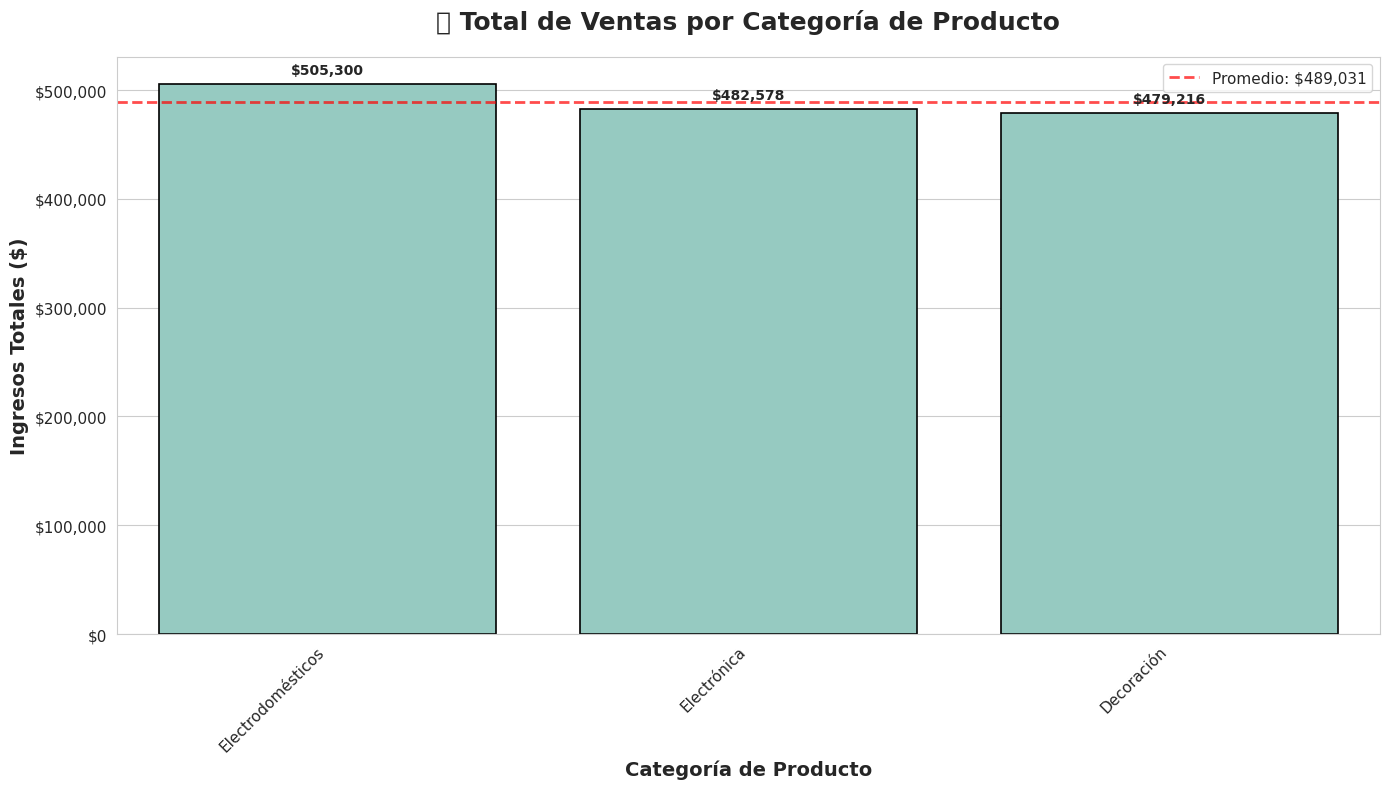


✅ Gráfico generado exitosamente
   Total de categorías visualizadas: 3


In [ ]:
# PASO 7: VISUALIZACIÓN - GRÁFICO DE BARRAS
print("\n" + "=" * 60)
print("PASO 7: VISUALIZACIÓN DE VENTAS POR CATEGORÍA")
print("=" * 60)

import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set3")

# Crear figura con tamaño adecuado
plt.figure(figsize=(14, 8))

# Crear gráfico de barras
ax = sns.barplot(
    data=ventas_por_categoria,
    x='categoria',
    y='ingresos_totales',
    # hue='categoria', # Removed this to simplify container structure and avoid the error
    legend=False,
    edgecolor='black',
    linewidth=1.2
)

# Personalizar el gráfico
plt.title('💰 Total de Ventas por Categoría de Producto',
          fontsize=18,
          fontweight='bold',
          pad=20)

plt.xlabel('Categoría de Producto', fontsize=14, fontweight='bold')
plt.ylabel('Ingresos Totales ($)', fontsize=14, fontweight='bold')

# Rotar etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=11)

# Agregar valores sobre las barras
# Iterate through the containers (there should be a single one now if hue is removed)
for container in ax.containers:
    ax.bar_label(
        container,
        labels=[f'${v:,.0f}' for v in ventas_por_categoria['ingresos_totales']],
        fontsize=10,
        fontweight='bold',
        padding=5
    )

# Formato del eje Y con separador de miles
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Agregar línea de promedio
promedio = ventas_por_categoria['ingresos_totales'].mean()
plt.axhline(
    y=promedio,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Promedio: ${promedio:,.0f}',
    alpha=0.7
)

plt.legend(fontsize=11, loc='upper right')

# Ajustar diseño para evitar cortes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

print(f"\n✅ Gráfico generado exitosamente")
print(f"   Total de categorías visualizadas: {len(ventas_por_categoria)}")

# OPCIONAL: Gráfico adicional - Top 10 categorías
if len(ventas_por_categoria) > 10:
    print("\n" + "-" * 60)
    print("📊 GRÁFICO ADICIONAL: TOP 10 CATEGORÍAS")
    print("-" * 60)

    plt.figure(figsize=(12, 7))

    top_10 = ventas_por_categoria.head(10)

    ax2 = sns.barplot(
        data=top_10,
        x='ingresos_totales',
        y='categoria',
        hue='categoria',
        legend=False,
        palette='rocket',
        edgecolor='black',
        linewidth=1.2
    )

    plt.title('🏆 Top 10 Categorías por Ingresos',
              fontsize=16,
              fontweight='bold',
              pad=15)

    plt.xlabel('Ingresos Totales ($)', fontsize=12, fontweight='bold')
    plt.ylabel('Categoría', fontsize=12, fontweight='bold')

    # Agregar valores al final de las barras
    for i, container in enumerate(ax2.containers):
        ax2.bar_label(
            container,
            labels=[f'${v:,.0f}' for v in top_10['ingresos_totales']],
            fontsize=10,
            fontweight='bold',
            padding=5
        )

    # Formato del eje X
    ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

    plt.tight_layout()
    plt.show()

    print(f"✅ Gráfico Top 10 generado exitosamente")

# Analizar la cantidad de ventas por dia de la semana .

📅 ANÁLISIS DE VENTAS POR DÍA DE LA SEMANA

------------------------------------------------------------
PASO 1: EXTRACCIÓN DEL DÍA DE LA SEMANA
------------------------------------------------------------
✅ Día de la semana extraído correctamente

Ejemplos:


,fecha_venta,dia_semana,producto,precio,cantidad
0,2024-01-02,Martes,Cuadro Decorativo,69.94,5
1,2024-01-02,Martes,Lámpara De Mesa,105.10,5
2,2024-01-02,Martes,Secadora,97.96,3
3,2024-01-02,Martes,Heladera,114.35,8
4,2024-01-02,Martes,Secadora,106.21,4
5,2024-01-02,Martes,Horno Eléctrico,35.35,9
6,2024-01-02,Martes,Plancha De Vapor,65.43,2
7,2024-01-02,Martes,Proyector,88.17,9
8,2024-01-03,Miércoles,Rincón De Plantas,79.86,11
9,2024-01-03,Miércoles,Candelabro,66.11,8



------------------------------------------------------------
PASO 2: CONTEO DE VENTAS POR DÍA
------------------------------------------------------------

📊 Resumen de ventas por día de la semana:


,dia_semana,num_ventas,cantidad_total,ingresos_totales
0,Lunes,418,2595,31917.56
1,Martes,439,2720,32119.39
2,Miércoles,439,2874,33280.80
3,Jueves,435,2952,32852.57
4,Viernes,378,2565,28078.65
5,Sábado,444,2900,33227.30
6,Domingo,447,2889,34247.10



------------------------------------------------------------
PASO 3: MÉTRICAS CLAVE
------------------------------------------------------------

📈 MÉTRICAS GENERALES:
   Total de ventas: 3,000
   Promedio por día: 428.6 ventas
   
🏆 Día con MÁS ventas: Domingo (447 ventas)
   📉 Día con MENOS ventas: Viernes (378 ventas)

📊 DISTRIBUCIÓN PORCENTUAL:
   Lunes.......    418 ventas ( 13.9%)
   Martes......    439 ventas ( 14.6%)
   Miércoles...    439 ventas ( 14.6%)
   Jueves......    435 ventas ( 14.5%)
   Viernes.....    378 ventas ( 12.6%)
   Sábado......    444 ventas ( 14.8%)
   Domingo.....    447 ventas ( 14.9%)

PASO 4: GRÁFICO DE VENTAS POR DÍA DE LA SEMANA


/tmp/ipython-input-3786668856.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
/tmp/ipython-input-3786668856.py:145: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


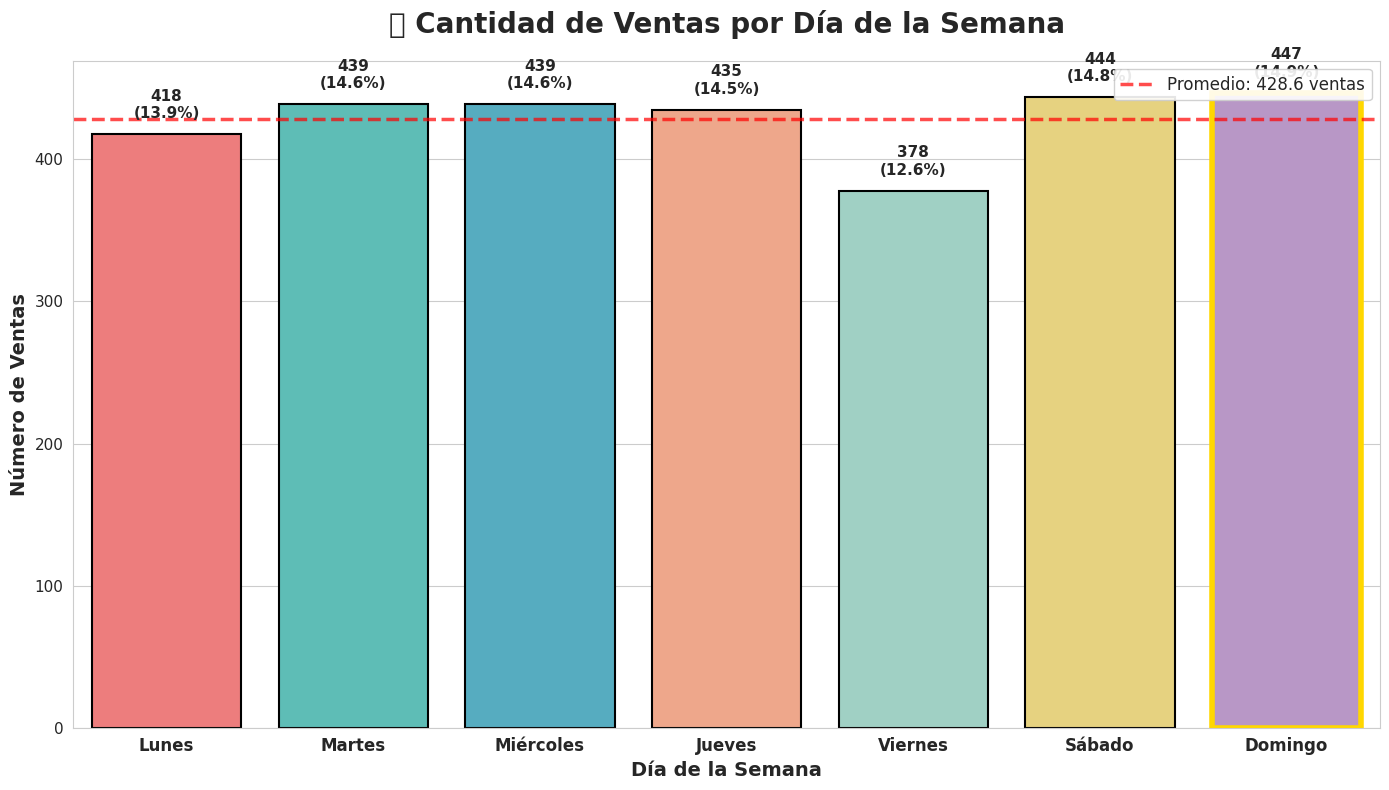


✅ Gráfico generado exitosamente
   El día con más actividad es: Domingo 🎯


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 60)
print("📅 ANÁLISIS DE VENTAS POR DÍA DE LA SEMANA")
print("=" * 60)

# PASO 1: EXTRAER DÍA DE LA SEMANA
print("\n" + "-" * 60)
print("PASO 1: EXTRACCIÓN DEL DÍA DE LA SEMANA")
print("-" * 60)

# Trabajar con el DataFrame de ventas (asegúrate de usar tu nombre correcto)
# Ajusta 'df_ventas' al nombre de tu DataFrame
df_trabajo = df_ventas_sinduplicados.copy()

# Extraer el día de la semana (0=Lunes, 6=Domingo)
df_trabajo['dia_semana_num'] = df_trabajo['fecha_venta'].dt.dayofweek

# Extraer el nombre del día en español
df_trabajo['dia_semana'] = df_trabajo['fecha_venta'].dt.day_name()

# Mapeo de nombres en inglés a español
mapeo_dias = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

df_trabajo['dia_semana'] = df_trabajo['dia_semana'].map(mapeo_dias)

print("✅ Día de la semana extraído correctamente")
print(f"\nEjemplos:")
display(df_trabajo[['fecha_venta', 'dia_semana', 'producto', 'precio', 'cantidad']].head(10))

# PASO 2: CONTAR VENTAS POR DÍA
print("\n" + "-" * 60)
print("PASO 2: CONTEO DE VENTAS POR DÍA")
print("-" * 60)

# Agrupar por día de la semana y contar ventas
ventas_por_dia = df_trabajo.groupby(['dia_semana_num', 'dia_semana']).agg({
    'id_venta': 'count',  # Contar número de ventas
    'cantidad': 'sum',     # Sumar cantidad de productos vendidos
    'precio': 'sum'        # Sumar ingresos totales (si quieres)
}).reset_index()

# Renombrar columnas para claridad
ventas_por_dia.columns = ['dia_num', 'dia_semana', 'num_ventas', 'cantidad_total', 'ingresos_totales']

# Ordenar por número de día (Lunes=0 a Domingo=6)
ventas_por_dia = ventas_por_dia.sort_values('dia_num').reset_index(drop=True)

print("\n📊 Resumen de ventas por día de la semana:")
display(ventas_por_dia[['dia_semana', 'num_ventas', 'cantidad_total', 'ingresos_totales']])

# PASO 3: MÉTRICAS CLAVE
print("\n" + "-" * 60)
print("PASO 3: MÉTRICAS CLAVE")
print("-" * 60)

total_ventas = ventas_por_dia['num_ventas'].sum()
promedio_ventas = ventas_por_dia['num_ventas'].mean()
dia_mas_ventas = ventas_por_dia.loc[ventas_por_dia['num_ventas'].idxmax()]
dia_menos_ventas = ventas_por_dia.loc[ventas_por_dia['num_ventas'].idxmin()]

print(f"\n📈 MÉTRICAS GENERALES:")
print(f"   Total de ventas: {total_ventas:,.0f}")
print(f"   Promedio por día: {promedio_ventas:,.1f} ventas")
print(f"   \n🏆 Día con MÁS ventas: {dia_mas_ventas['dia_semana']} ({dia_mas_ventas['num_ventas']:,.0f} ventas)")
print(f"   📉 Día con MENOS ventas: {dia_menos_ventas['dia_semana']} ({dia_menos_ventas['num_ventas']:,.0f} ventas)")

# Calcular porcentajes
ventas_por_dia['porcentaje'] = (ventas_por_dia['num_ventas'] / total_ventas * 100)

print(f"\n📊 DISTRIBUCIÓN PORCENTUAL:")
for idx, row in ventas_por_dia.iterrows():
    print(f"   {row['dia_semana']:.<12} {row['num_ventas']:>6,.0f} ventas ({row['porcentaje']:>5.1f}%)")

# PASO 4: VISUALIZACIÓN
print("\n" + "=" * 60)
print("PASO 4: GRÁFICO DE VENTAS POR DÍA DE LA SEMANA")
print("=" * 60)

# Configurar estilo
sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))

# Crear gráfico de barras
colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F', '#BB8FCE']
ax = sns.barplot(
    data=ventas_por_dia,
    x='dia_semana',
    y='num_ventas',
    palette=colores,
    edgecolor='black',
    linewidth=1.5
)

# Personalizar el gráfico
plt.title('📅 Cantidad de Ventas por Día de la Semana',
          fontsize=20,
          fontweight='bold',
          pad=20)

plt.xlabel('Día de la Semana', fontsize=14, fontweight='bold')
plt.ylabel('Número de Ventas', fontsize=14, fontweight='bold')

# Agregar valores sobre las barras
for i, (idx, row) in enumerate(ventas_por_dia.iterrows()):
    ax.text(i, row['num_ventas'] + (ventas_por_dia['num_ventas'].max() * 0.02),
            f"{row['num_ventas']:,.0f}\n({row['porcentaje']:.1f}%)",
            ha='center',
            va='bottom',
            fontsize=11,
            fontweight='bold')

# Agregar línea de promedio
plt.axhline(
    y=promedio_ventas,
    color='red',
    linestyle='--',
    linewidth=2.5,
    label=f'Promedio: {promedio_ventas:,.1f} ventas',
    alpha=0.7
)

# Destacar el día con más ventas
max_idx = ventas_por_dia['num_ventas'].idxmax()
ax.patches[max_idx].set_edgecolor('gold')
ax.patches[max_idx].set_linewidth(4)

plt.legend(fontsize=12, loc='upper right', framealpha=0.9)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=11)

# Formato del eje Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

plt.tight_layout()
plt.show()

print(f"\n✅ Gráfico generado exitosamente")
print(f"   El día con más actividad es: {dia_mas_ventas['dia_semana']} 🎯")

In [ ]:
# Aplicar la función de limpieza a df_ventas
df_ventas_limpio, resumen_ventas = limpiar_dataset(
    df_ventas.copy(),  # Usar una copia para no modificar el original directamente
    eliminar_duplicados=True,
    columnas_numericas_a_limpiar={'precio': ['$', ','], 'cantidad': ['[^0-9.]']}, # Limpiar $ y cualquier caracter no numerico en precio, y no numerico en cantidad
    normalizacion_texto='title' # Normalizar texto a formato título
)

# Mostrar el resumen de la limpieza
print("\n" + "=" * 60)
print("RESUMEN DE LIMPIEZA - df_ventas")
print("=" * 60)
print(resumen_ventas)